![](kaggle.png)

주소 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

선형 회귀 적용

# 기본 세팅

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


house_df_org = pd.read_csv('train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

# 전처리

In [2]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# ID는 고유값이기 때문에 가격 측정에 아무런 도움이 되지 않는다. 
# 그렇기 때문에 이를 따로 저장해두고 피처 데이터셋에서 삭제해준다. (inplace=True)
house_ID = house_df['Id']


house_df.drop("Id", axis = 1, inplace = True)

** 크기 / 타입 / 결측치 개수 확인 **

In [5]:
print('데이터 세트의 Shape:', house_df.shape) # Id 열 삭제 이후에 컬럼이 하나 줄어든 것을 확인할 수 있다.
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 80)

전체 feature 들의 type 
 object     43
int64      34
float64     3
dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


** 이상치 제거 ** 

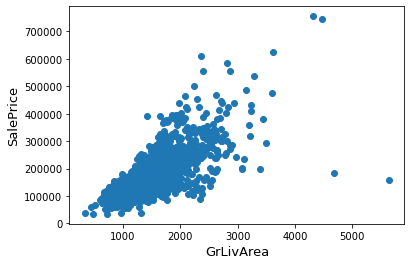

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = house_df['GrLivArea'], y = house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

오른쪽 하단의 포인트 2개가 이상치임을 확인할 수 있다. 이상치를 확인하는 방법은 선형 직선을 그었을 때 값에서 크게 벗어난 것을 확인하는 것인데 이 두 점이 벗어난 것을 확인할 수 있다. 이런 이상치들은 선형 회귀 부분에서 예측 성능에 큰 저하를 일으킬 수 있으므로 삭제해준다.

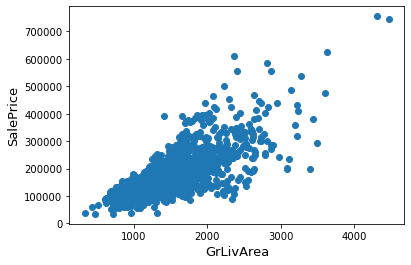

In [7]:
# 이상치 삭제
house_df = house_df.drop(house_df[(house_df['GrLivArea']>4000) & (house_df['SalePrice']<300000)].index)

# 이상치 삭제한 이후에 확인
fig, ax = plt.subplots()
ax.scatter(house_df['GrLivArea'], house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

** 타겟값 SalePrice의 분포도 확인 **

<AxesSubplot:title={'center':'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

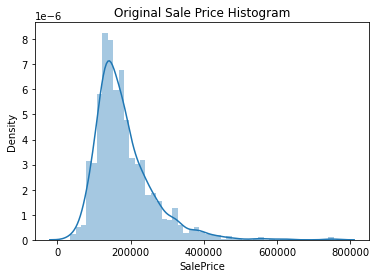

In [8]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

타겟 데이터 값의 분포가 중심에서 왼쪽으로 치우친 형태로, 정규 분포에서 벗어나 있는 것을 확인

정규 분포가 아닌 결괏값을 정규 분포 형태로 변환하기 위해 로그 변환을 사용 -> np.log1p()

넘파이의 log1p()를 이용해 로그 변환한 결괏값을 기반으로 학습한 뒤, 예측 시에는 다시 결괏값을 expm1()으로 추후에 환원

<AxesSubplot:title={'center':'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

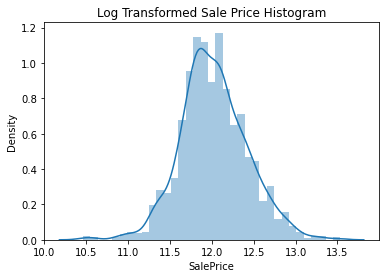

In [9]:
plt.title('Log Transformed Sale Price Histogram')
log_Saleprice = np.log1p(house_df['SalePrice'])
sns.distplot(log_Saleprice)

정규 분포 형태로 변환됨을 확인

** 타겟값인 Price를 로그변환하여 정규 분포 형태로 변환하고, 피처들 중 숫자형 컬럼의 Null값 데이터 처리 **

In [10]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])


## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [11]:
house_df.isnull().sum().sum()

520

** 범주형(카테고리) 데이터 처리 – 원핫 인코딩 **

이제 범주형(카테고리) 피처를 제외하고는 Null 값이 없지만 아직 520개가 남아있다. 범주형 피처는 모두 원-핫 인코딩으로 변환하겠습니다.
원핫인코딩은 판다스의 get_dummies()를 이용하였음 
get_dummise()는 자동으로 문자열 피처를 원-핫 인코딩으로 변환하면서 Null 값은 'None' 칼럼으로 대체해주기 때문에 별도로 결측지를 제거해주지 않아도 괜찮다. 
하지만 원핫 인코딩을 사용하기 때문에 컬럼수는 늘어난다.

In [12]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])


get_dummies() 수행 전 데이터 Shape: (1458, 75)
get_dummies() 수행 후 데이터 Shape: (1458, 270)
## Null 피처의 Type :
 Series([], dtype: object)


** 피처 데이트 세트의 데이터 분포도 확인 -> 필요시 변환 작업(로그변환) **

피처 데이터 세트의 경우도 지나치게 왜곡된 피처가 존재할 경우 회귀 예측 성능을 저하시킬 수 있다.
사이파이 stats 모듈의 skew() 함수를 이용하여 칼럼의 데이터 세트의 왜곡된 정도를 쉽게 추출 가능

일반적으로 skew() 함수의 반환 값이 1이상인 경우를 왜곡 정도가 높다고 판단하지만 상황에 따라 편차는 있음

주의할 점은 skew()를 적용하는 숫자형 피처에서 원핫 인코딩된 카테고리 숫자형 피처는 제외해야함. 카테고리 피처는 코드성 피처이므로 인코딩 시 당연히 왜곡될 가능성이 높다.(예를 들어, 화장실 여부가 yes가 1000개 no가 10개 있으면 1이 1000건, 0이 10건 있지만 이는 왜곡과 무관한 그냥 사실일 뿐이다.)

In [13]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = house_df[features_index].apply(lambda x : skew(x))

# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.434913
PoolArea         15.932532
LotArea          12.560986
3SsnPorch        10.286510
LowQualFinSF      8.995688
KitchenAbvGr      4.480268
BsmtFinSF2        4.247550
ScreenPorch       4.114690
BsmtHalfBath      4.095895
EnclosedPorch     3.083987
MasVnrArea        2.692399
OpenPorchSF       2.337421
LotFrontage       1.699430
WoodDeckSF        1.544214
MSSubClass        1.405563
GrLivArea         1.009951
dtype: float64


In [14]:
# 왜곡도가 1 이상인 피처들은 로그 변환 적용하고 다시 하이퍼 파라미터 튜닝 후
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 선형 회귀 모델 학습 / 예측 / 평가

** 모델의 평가는 RMSE를 이용해서 평가 **

In [15]:
# RMSE 평가 함수 생성
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

** LinearRegression, Ridge, Lasso, ElasticNet 학습, 예측, 평가 ** 

In [16]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=0)

# LinearRegression, Ridge, Lasso, ElasticNet 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Elastic_reg = ElasticNet()
Elastic_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, Elastic_reg]
get_rmses(models)


LinearRegression 로그 변환된 RMSE: 0.107
Ridge 로그 변환된 RMSE: 0.105
Lasso 로그 변환된 RMSE: 0.157
ElasticNet 로그 변환된 RMSE: 0.15


[0.1068204036357828,
 0.10471022659116729,
 0.15741408966245998,
 0.1502356619667512]

라쏘회귀와 엘라스틱넷 회귀의 예측 성능이 다른 회귀 방법 보다 떨어지는 것을 확인 -> 하이퍼 파라미터 튜닝이 필요함

피처별 회귀 계수를 시각화해서 모델별로 어떠한 피처의 회귀 계수로 구성되는지 확인

피처가 많으니 회귀 계수는 상위 10개, 하위 10개의 값만 출력

In [17]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

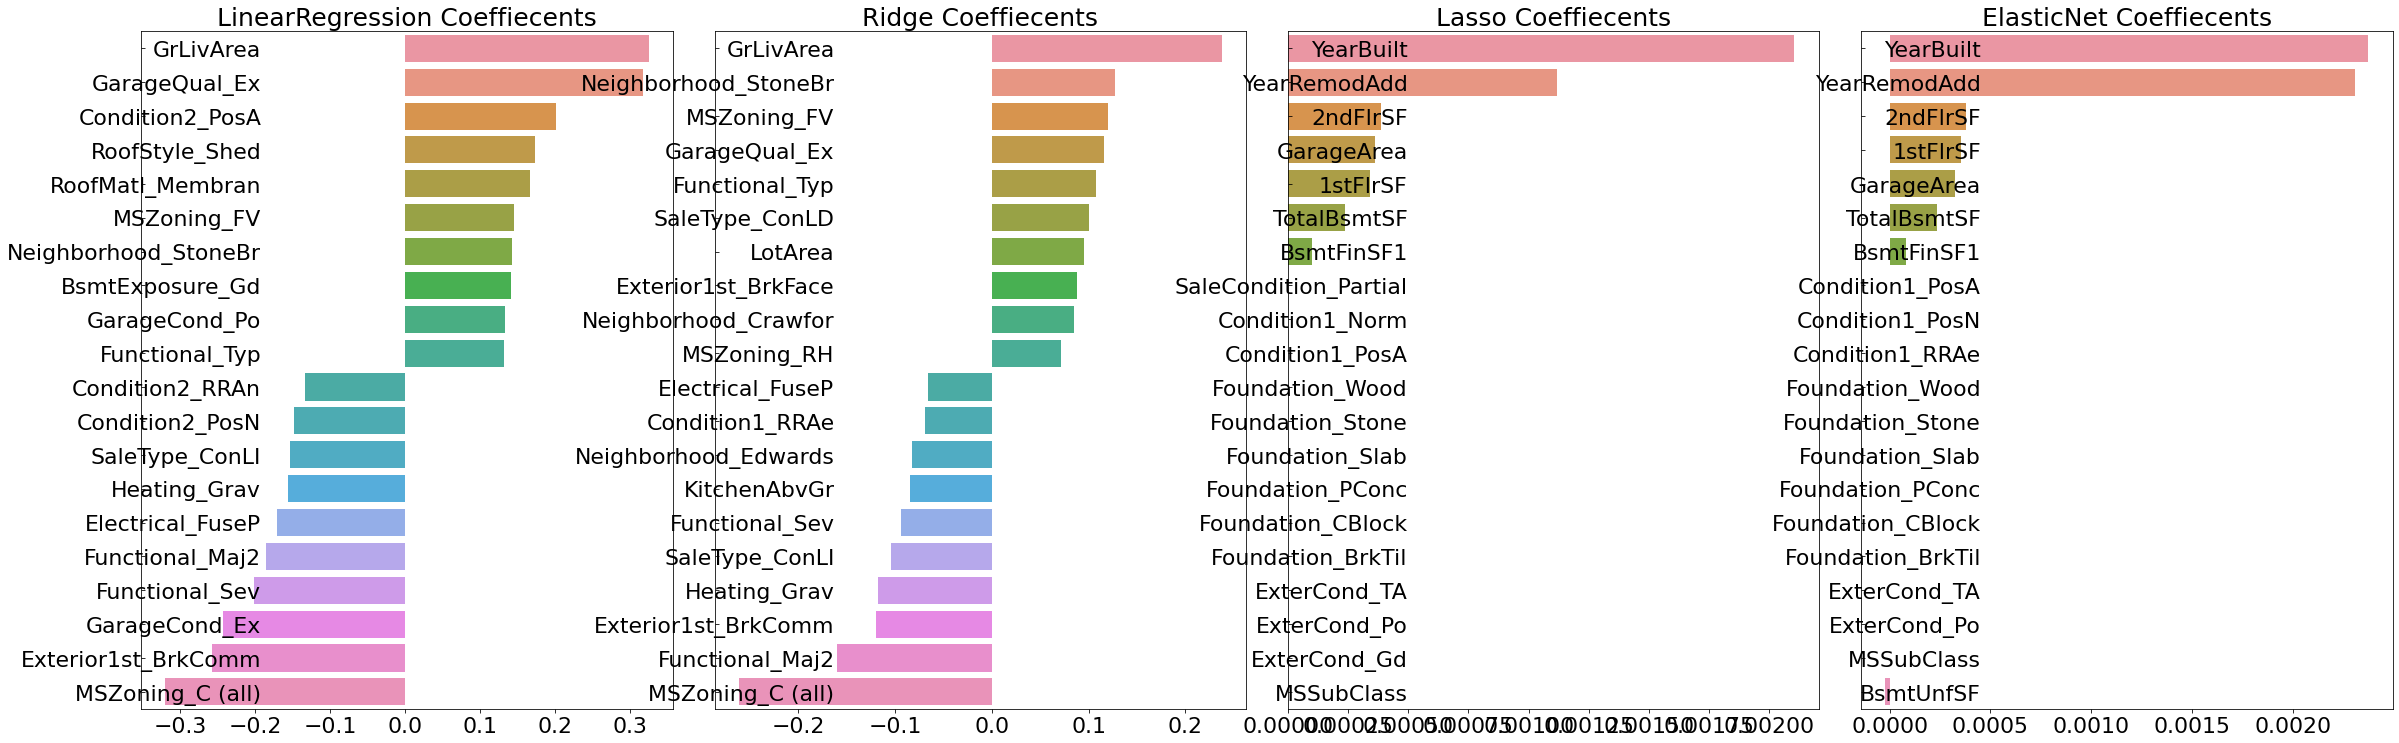

In [18]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(32,10),nrows=1, ncols=4)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg, Elastic_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg, Elastic_reg]
visualize_coefficient(models)


** 5 폴드 교차검증으로 모델별로 RMSE와 평균 RMSE출력 **

In [19]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg, Elastic_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg, Elastic_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.117 0.126 0.14  0.11  0.116]
LinearRegression CV 평균 RMSE 값: 0.122

Ridge CV RMSE 값 리스트: [0.109 0.119 0.128 0.105 0.113]
Ridge CV 평균 RMSE 값: 0.115

Lasso CV RMSE 값 리스트: [0.165 0.172 0.174 0.174 0.172]
Lasso CV 평균 RMSE 값: 0.172

ElasticNet CV RMSE 값 리스트: [0.163 0.165 0.164 0.167 0.167]
ElasticNet CV 평균 RMSE 값: 0.165


** 각 모델들의 alpha값을 변경하면서 하이퍼 파라미터 튜닝 후 다시 재 학습/예측/평가 ** 

In [20]:
# 릿지와 라쏘의 그리드서치를 통한 최적의 하이퍼파라미터 찾기
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
elastic_params = { 'alpha':[0.001, 0.001, 0.07, 0.1, 0.5, 1, 3] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)
best_elastic = get_best_params(Elastic_reg, elastic_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.1118, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1119, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 RMSE 값: 0.11, 최적 alpha:{'alpha': 0.001}


** 최적 하이퍼 파라미터를 찾은 이후에 다시 재학습 및 평가 **

LinearRegression 로그 변환된 RMSE: 0.107
Ridge 로그 변환된 RMSE: 0.104
Lasso 로그 변환된 RMSE: 0.1
ElasticNet 로그 변환된 RMSE: 0.1


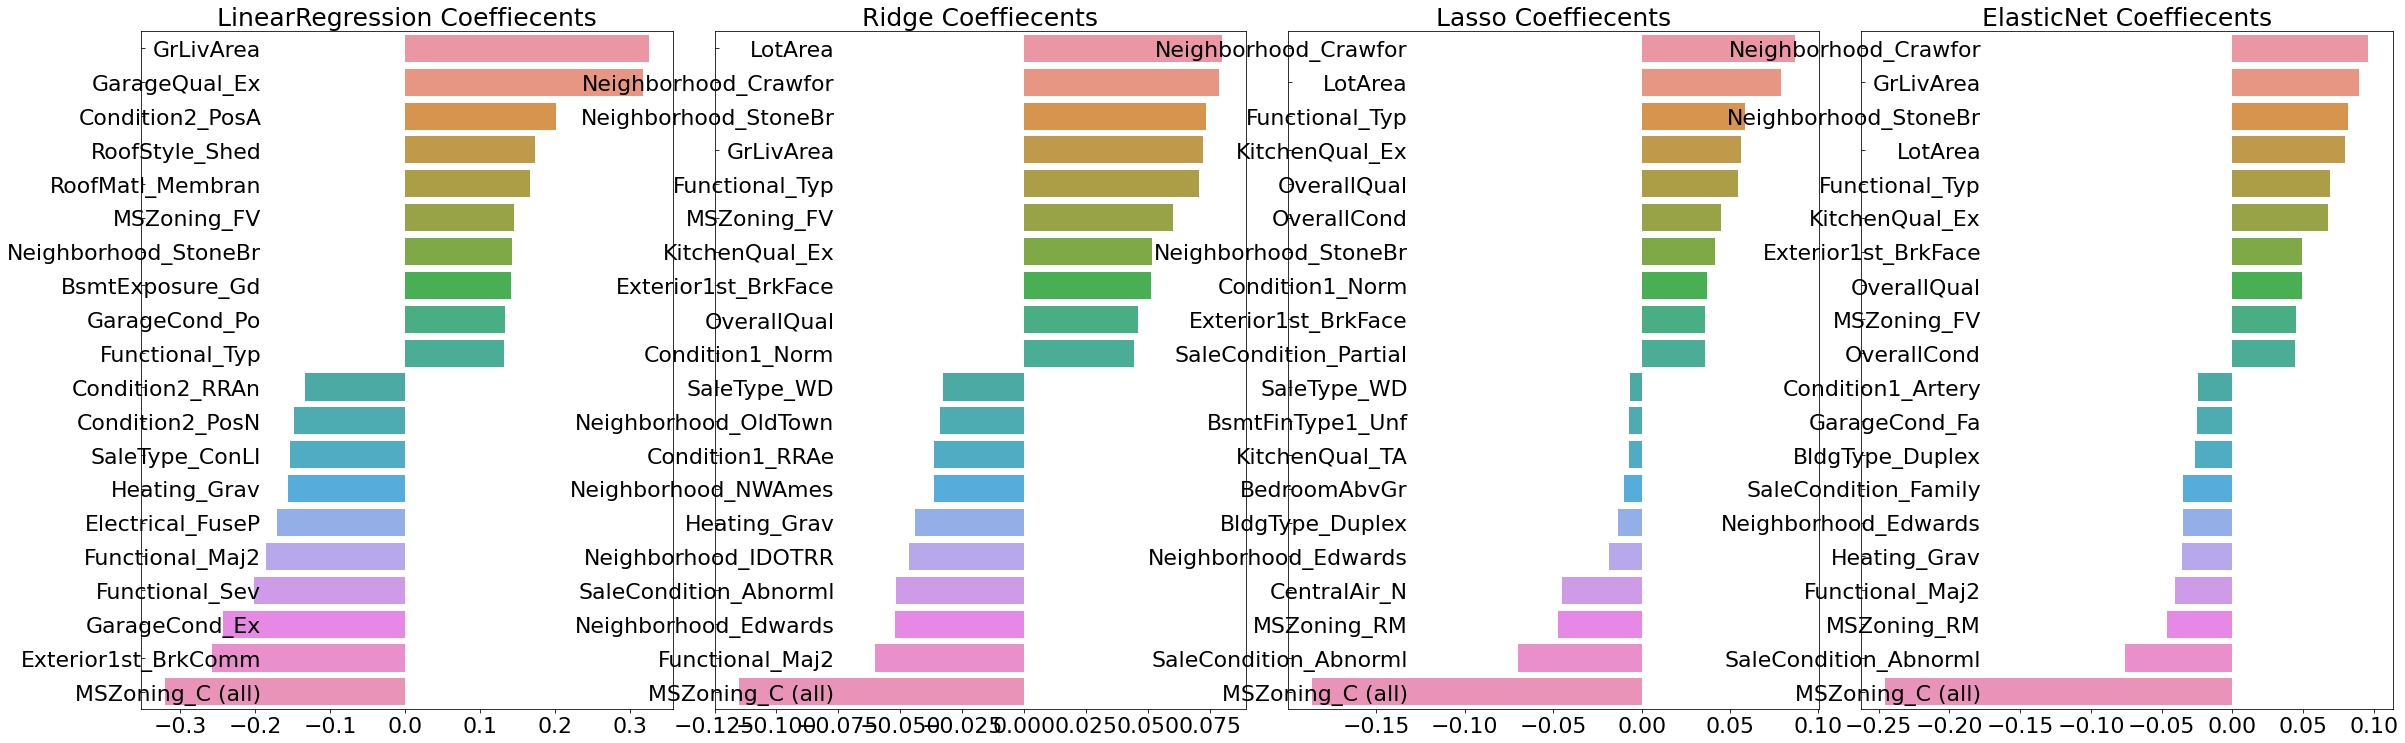

In [21]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
Elastic_reg = ElasticNet(alpha=0.001)
Elastic_reg.fit(X_train, y_train)
# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg, Elastic_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg, Elastic_reg]
visualize_coefficient(models)

라쏘 회귀와 엘라스틱넷 회귀는 최적의 하이퍼파라미터를 찾은 이후에 예측 성능이 아주 올라간 것을 확인할 수 있다.